#Import bibliotek, deklaracja klasy do tworzenia grafów

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import matching
import numpy as np

In [40]:
class BipartiteGraph():

    def __init__(self, graph, idx):
        self.idx = idx
        n = len(set().union(*graph.values()))
        self.ls = np.zeros((n, len(graph.keys())))
        nodes_a = range(n)
        for j, nodes_b in enumerate(sorted(graph.keys(), key=lambda x: int(x[1:]))):
            for nb in graph[nodes_b]:
                self.ls[nb][j] = 1
        self.counter = 0

    def draw_all_edges(self):
        g = nx.Graph()

        a = ['a'+str(i) for i in range(len(self.ls))]
        b = ['b'+str(j) for j in range(len(self.ls[0]))]

        g.add_nodes_from(a, bipartite=0)
        g.add_nodes_from(b, bipartite=1)

        for i in range(len(self.ls)):
            for j in range(len(self.ls[i])):
                if self.ls[i][j] != 0:
                    g.add_edge(a[i], b[j])

        const = 0.1
        y = 1.0

        x_a = 0.1
        pos_a = {}
        for i in range(len(a)):
            pos_a[a[i]] = [x_a, y - i*const]

        x_b = 0.5
        pos_b = {}
        for i in range(len(b)):
            pos_b[b[i]] = [x_b, y - i*const]

        nx.draw_networkx_nodes(g, pos_a, nodelist=a, node_color='r', node_size=300)
        nx.draw_networkx_nodes(g, pos_b, nodelist=b, node_color='b', node_size=300)

        pos = {}
        pos.update(pos_a)
        pos.update(pos_b)

        nx.draw_networkx_edges(g, pos, edgelist=nx.edges(g))
        nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

        # Maximal matching
        # m = matching.maximal_matching(g)
        # print('Maximal matching has cardinality [', len(m), ']')
        # nx.draw_networkx_edges(g, pos, edgelist=m, width=1, edge_color='#CC1559')

        plt.axis('off')

        plt.savefig('images/bipartite_' + self.idx + '.pdf')
        plt.show()
        plt.close()

    def draw_given_edges(self, m, state='n'):
        g = nx.Graph()

        a = ['a'+str(i) for i in range(len(self.ls))]
        b = ['b'+str(j) for j in range(len(self.ls[0]))]

        g.add_nodes_from(a, bipartite=0)
        g.add_nodes_from(b, bipartite=1)

        const = 0.1
        y = 1.0

        x_a = 0.1
        pos_a = {}
        for i in range(len(a)):
            pos_a[a[i]] = [x_a, y - i*const]

        x_b = 0.5
        pos_b = {}
        for i in range(len(b)):
            pos_b[b[i]] = [x_b, y - i*const]

        nx.draw_networkx_nodes(g, pos_a, nodelist=a, node_color='r', node_size=300)
        nx.draw_networkx_nodes(g, pos_b, nodelist=b, node_color='b', node_size=300)

        pos = {}
        pos.update(pos_a)
        pos.update(pos_b)

        nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

        nx.draw_networkx_edges(g, pos, edgelist=m, width=1, edge_color='#CC1559')

        plt.axis('off')

        if state == 'a':
            descr = self.idx + str(self.counter)
            self.counter = self.counter + 1
        else:
            descr = self.idx

        plt.savefig('images/bipartite_edg_' + descr + '.pdf')
        plt.show()
        plt.close()

#przykładowy graf

In [3]:
graph = { 'b0': {1}, 'b1': {0, 1, 2}, 'b2': {1, 2}, 'b3': {2, 3, 4}, 'b4' : {3 ,4 }, 'b5': {4, 5, 6}, 'b6': {5, 6, 7}, 'b7': {8}}

FileNotFoundError: ignored

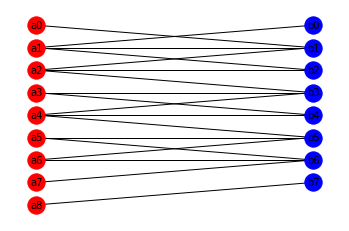

In [4]:
bg = BipartiteGraph(graph, 'test')
bg.draw_all_edges()

In [ ]:
m = [{'b2', 'a5'}, {'b4', 'a1'}]
bg.draw_given_edges(m)

#algorytm zachłanny

In [5]:
n = 9 
advertisers = dict(zip(range(n), [10]*n))
graph = {'b0': {0}, 'b1': {0}}

In [6]:
def greedy_matching(queries, graph, advertisers):
  edges = []
  bg = BipartiteGraph(graph, 'greedy')

  graph_2 = graph.copy()
  advers = advertisers.copy()
  revenue = 0

  for q in queries:
    bidders = graph_2[q]
    if advers[list(bidders)[0]] == 0 and len(bidders) == 1:
      continue
    else:
      for b in bidders:
        if advers[b] == 0:
          graph_2[q] = graph_2[q].difference([b])
        
      ad = {k: advers[k] for k in graph_2[q]}
      if len(ad) == 0:
        break
      choosen = list(ad.items())[-1][0]
      print(choosen)
      advers[choosen] -= 1
      revenue += 1
      edges.append((q, 'a' + str(choosen)))
      m = [(q, 'a' + str(choosen))]
      # bg.draw_given_edges(m)
  print(f' Total revenue is equal: {revenue}')

  return edges

In [7]:
queries = ['b1', 'b1', 'b1', 'b1', 'b1', 'b0', 'b1', 'b0']   
graph = {'b0': {0, 1}, 'b1': {0}}
advertisers = {0: 4, 1: 4}

greedy_matching(queries, graph, advertisers)

0
0
0
0
1
1
 Total revenue is equal: 6


[('b1', 'a0'),
 ('b1', 'a0'),
 ('b1', 'a0'),
 ('b1', 'a0'),
 ('b0', 'a1'),
 ('b0', 'a1')]

#algorytm zbalansowany

In [8]:
def balance(queries, graph, advertisers):
  edges = []
  bg = BipartiteGraph(graph, 'balance')

  graph_2 = graph.copy()
  advers = advertisers.copy()
  revenue = 0 
  for q in queries:
    bidders = graph_2[q]
    for b in bidders:
      if advers[b] == 0:
        graph_2[q] = graph_2[q].difference([b])
    ad = {k: advers[k] for k in graph_2[q]}
    print(ad)
    if len(ad) == 0:
      break
    choosen = sorted(ad.items(), key = lambda x: x[1])[-1][0]
    print(choosen)
    advers[choosen] -= 1
    revenue += 1
    edges.append((q, 'a' + str(choosen)))
    m = [(q, 'a' + str(choosen))]
    #bg.draw_given_edges(m)
  #print(f' Total revenue is equal: {revenue}')
  return edges      

In [9]:
queries = ['b0', 'b0', 'b0', 'b0', 'b1', 'b1', 'b1', 'b2']   # to są słowa kluczowe
graph = {'b0': {0, 1}, 'b1': {0}}
advertisers = {0: 4, 1: 4}
ctr = {'b0': 0.01, 'b1': 0.02, 'b2': 0.025}

balance(queries, graph, advertisers)

{0: 4, 1: 4}
1
{0: 4, 1: 3}
0
{0: 3, 1: 3}
1
{0: 3, 1: 2}
0
{0: 2}
0
{0: 1}
0
{}


[('b0', 'a1'),
 ('b0', 'a0'),
 ('b0', 'a1'),
 ('b0', 'a0'),
 ('b1', 'a0'),
 ('b1', 'a0')]

# Homework - zbalansowany algorytm z bid

In [ ]:
def balance_algorithm_var(queries, advertisers, graph):
    # BALANCE algorithm for different bids & value of bids on vertex
    edges = []
    return edges

In [42]:
def balance_ctr(queries, graph, advertisers, bid, ctr):
  edges = []
  bg = BipartiteGraph(graph, 'balance')

  graph_2 = graph.copy()
  advers = advertisers.copy()
  revenue = 0 
  for q in queries:
    bidders = graph_2[q]
    if advers[list(bidders)[0]] == 0 and len(bidders) == 1:
      continue
    else:
      for b in bidders:
        if advers[b] == 0:
          graph_2[q] = graph_2[q].difference([b])
      ad = {k: advers[k] for k in graph_2[q]}
      bid_ctr = {k: bid[k]*ctr[q] for k in graph_2[q]}
      #print(bid_ctr)
      if len(ad) == 0:
        break
      choosen = sorted(bid_ctr.items(), key = lambda x: x[1])[-1][0]
      #choosen = sorted(ad.items(), key = lambda x: x[1])[-1][0]
      advers[choosen] -= bid_ctr[choosen]
      print(advers)
      revenue += bid_ctr[choosen]
      edges.append((q, 'a' + str(choosen)))
      m = [(q, 'a' + str(choosen))]
      #bg.draw_given_edges(m)
  print(f' Total revenue is equal: {revenue}')
  return edges    

In [43]:
queries = ['b0', 'b0', 'b0', 'b0', 'b1', 'b1', 'b1', 'b0']   # to są słowa kluczowe
graph = {'b0': {0, 1}, 'b1': {0}}
advertisers = {0: 4, 1: 4}
bid = {0: 0.5, 1: 1}
ctr = {'b0': 0.5, 'b1': 1}

balance_ctr(queries, graph, advertisers, bid, ctr)


{0: 4, 1: 3.5}
{0: 4, 1: 3.0}
{0: 4, 1: 2.5}
{0: 4, 1: 2.0}
{0: 3.5, 1: 2.0}
{0: 3.0, 1: 2.0}
{0: 2.5, 1: 2.0}
{0: 2.5, 1: 1.5}
 Total revenue is equal: 4.0


[('b0', 'a1'),
 ('b0', 'a1'),
 ('b0', 'a1'),
 ('b0', 'a1'),
 ('b1', 'a0'),
 ('b1', 'a0'),
 ('b1', 'a0'),
 ('b0', 'a1')]